Mohammad Mahdi Parchami </br>
400243084

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.manifold import TSNE


In [2]:
df = pd.read_csv('./data/credit-g.csv')
df_numerical_features = df.select_dtypes(include='number')
df_categorical_features = df.select_dtypes(include='object')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


<h3>ProfileReport</h3>
ProfileReport is a tool from the ydata_profiling library that automatically generates a detailed report for a given dataset.</br>
The report includes statistical summaries, visualizations, and insights on variables, data types, missing values, correlations, distributions, and more. It helps in quickly understanding and exploring the data.</br>

this is axcactly what we need for this project to figure out how datas are related to the target by correlation and other statistical methods.</br>

In [3]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file(output_file="output_min.html")

In [4]:
y = df['class']
y = y.apply(lambda x: 1 if x == 'bad' else 0)
X = df.drop(['class'], axis=1)

In [5]:

target_col = 'class'

def get_null_accuracy(df):
    null_acc = df[target_col].value_counts()/len(df)
    print(f"Null accuracy: {null_acc.max() * 100: .2f}%")
    return null_acc

def split_data(df):
    df0 = df.dropna(subset=[target_col]) # drop rows with missing target
    X = df0.drop([target_col], axis=1) # drop target column
    y = df0[target_col].apply(lambda x: 1 if x == 'bad' else 0) # encode target
    return train_test_split(X, y, test_size = 0.2, random_state = 0) # split data


def fit_and_evaluate(model, X_train, y_train, X_test, y_test):
    
    model = model.fit(X_train, y_train) # fit model
    y_pred = model.predict(X_test) # predict on test set
    
    # accuracy
    print(f'Train accuracy score: {accuracy_score(y_train, model.predict(X_train)) * 100:.2f}%')
    print(f'Test accuracy score: {accuracy_score(y_test, y_pred) * 100:0.2f}%')
    
    # f1 score
    print(f'Train f1 score: {f1_score(y_train, model.predict(X_train)) * 100:.2f}%')
    print(f'Test f1 score: {f1_score(y_test, y_pred) * 100:0.2f}%')
    
    # precision
    print(f'Train precision score: {precision_score(y_train, model.predict(X_train)) * 100:.2f}%')
    print(f'Test precision score: {precision_score(y_test, y_pred) * 100:0.2f}%')
    
    # recall
    print(f'Train recall score: {recall_score(y_train, model.predict(X_train)) * 100:.2f}%')
    print(f'Test recall score: {recall_score(y_test, y_pred) * 100:0.2f}%')
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    return model



In [6]:
ordinal = ['employment', 'savings_status']
categorical = ['checking_status', 'credit_history', 'purpose',
            'personal_status', 'other_parties', 'property_magnitude',
            ' other_payment_plans', 'housing', 'job', 'own_telephone',
            ' foreign_worker']
numerical = ['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents']

In [7]:
# getting all possible values for each ordinal feature
for o in ordinal:
    print(df[o].unique())

['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']


In [8]:
em = ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7']
save = ['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000']
ohe = OneHotEncoder()
# category ordering (within each feature) is defined by you
oe = OrdinalEncoder(categories=[em, save])

In [9]:
ordinal_transformer = make_pipeline(
    OrdinalEncoder(categories=[em, save])
)

categorical_transformer = make_pipeline(
    OneHotEncoder()
)

numerical_transformer = make_pipeline(
    # standardize data
    StandardScaler()
)

preprocessor = make_column_transformer(
    (numerical_transformer, numerical),
    (categorical_transformer, categorical),
    (ordinal_transformer, ordinal)
)


preprocessing_pipeline = make_pipeline(
    preprocessor,
    # Add more steps to the pipeline if needed
)


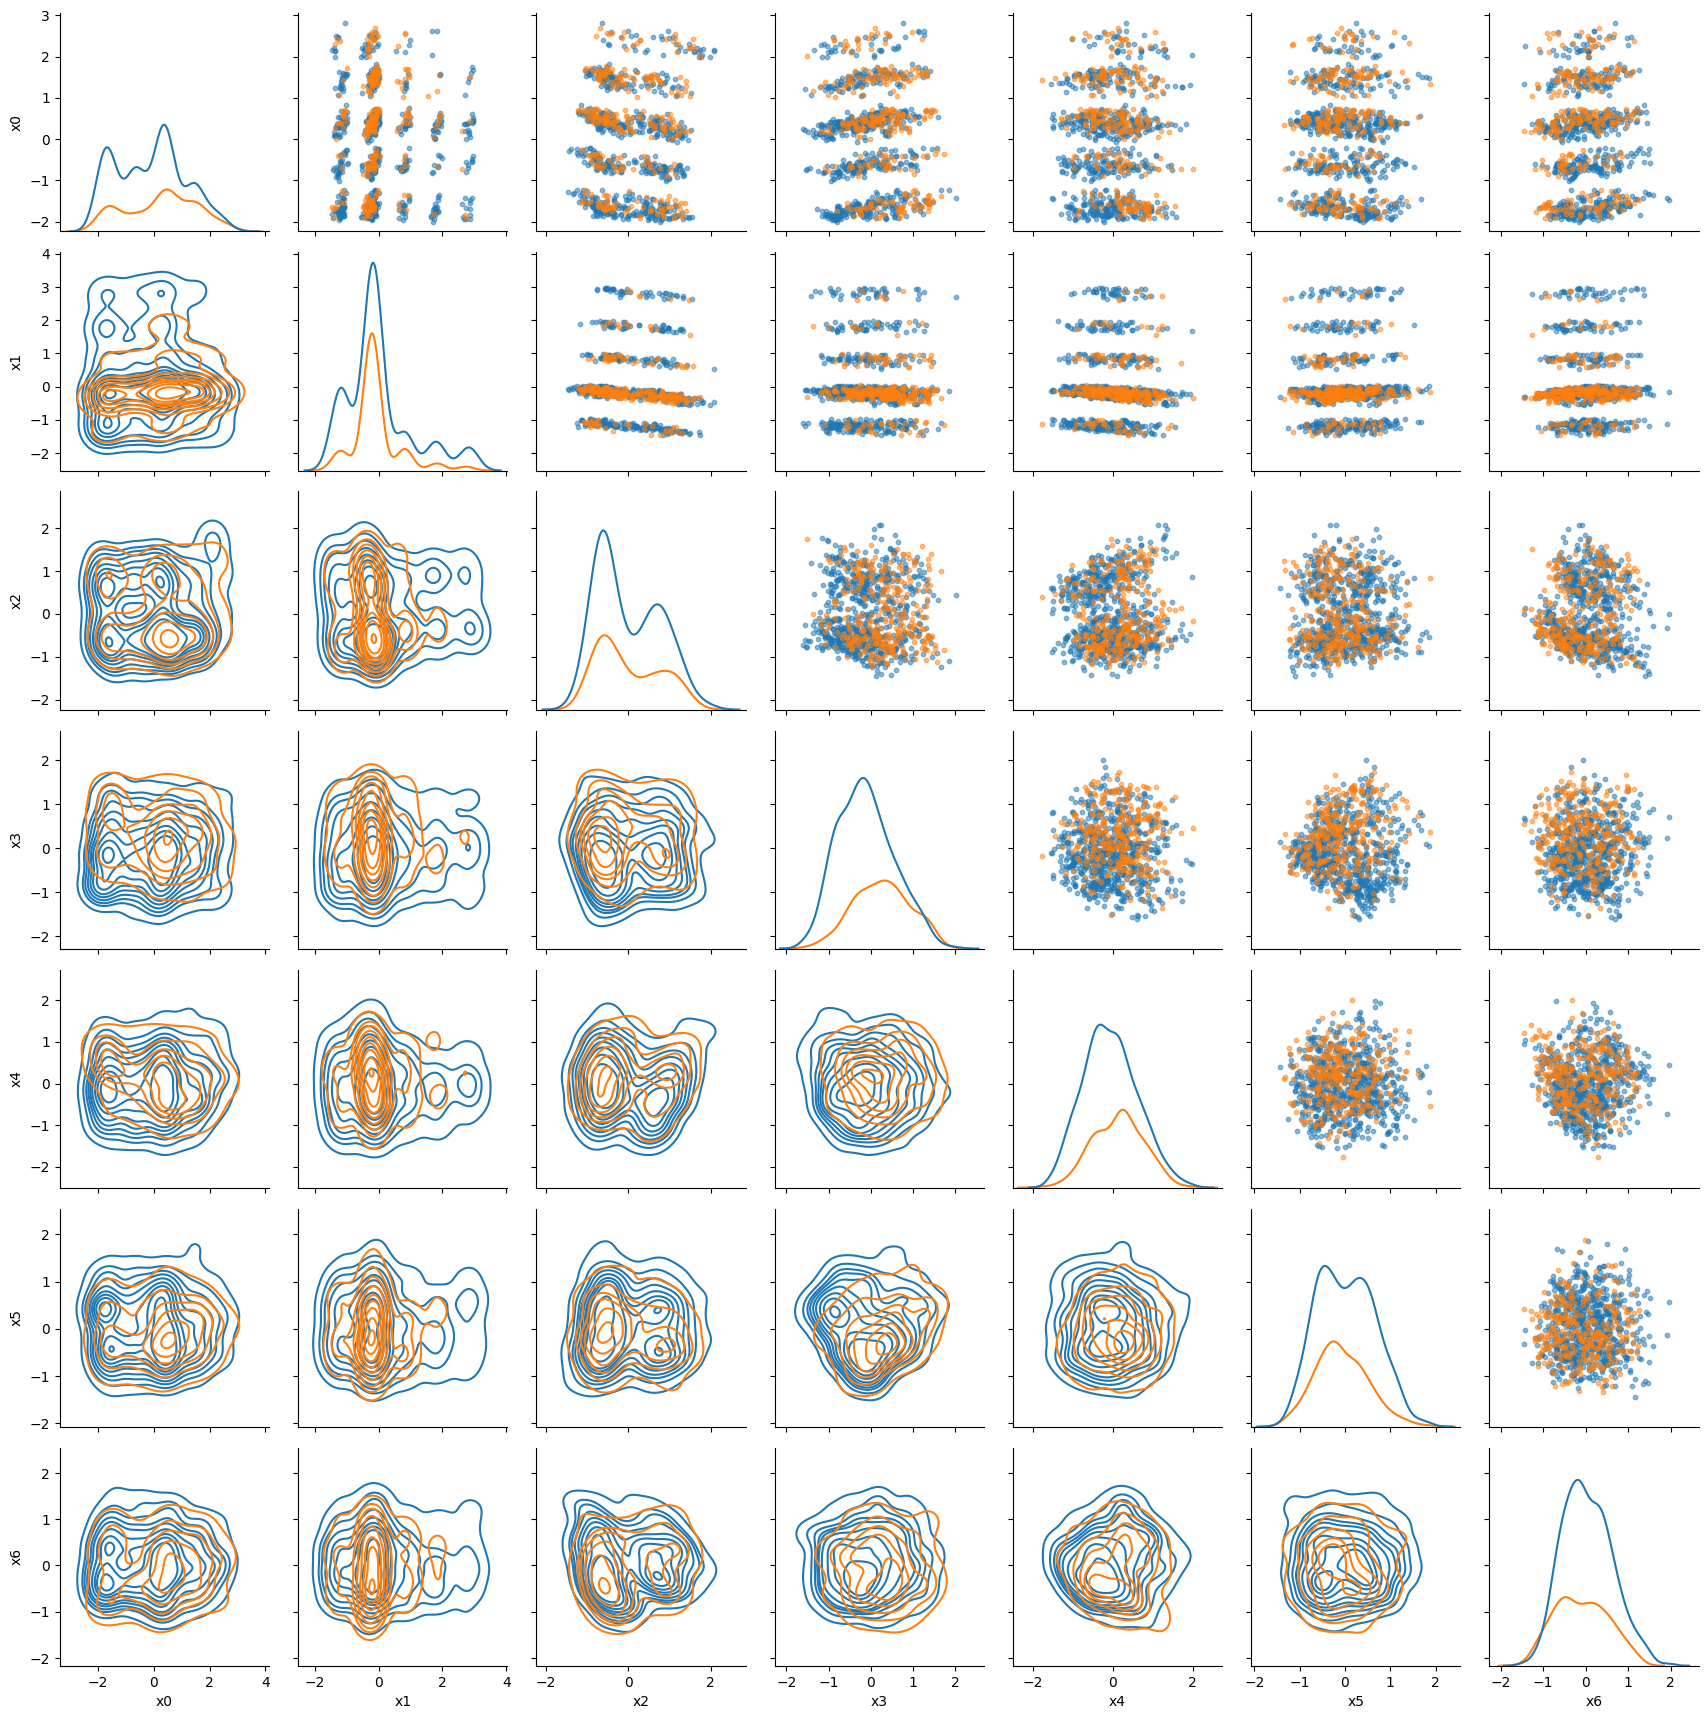

In [10]:
pca = PCA(n_components=7)

column_trans = make_column_transformer(
    (ohe, categorical),
    (oe, ordinal),
    (MinMaxScaler(), numerical),
    remainder='passthrough')


X_ = column_trans.fit_transform(X)


X_pca = pca.fit_transform(X_)

df_pca = pd.DataFrame(X_pca, columns=[f'x{i}' for i in range(7)])
df_pca['target'] = y

plot_grid = sns.PairGrid(data=df_pca, vars=[f'x{i}' for i in range(7)], hue='target')

plot_grid = plot_grid.map_upper(plt.scatter, alpha=.5, s=10)
plot_grid = plot_grid.map_lower(sns.kdeplot)
plot_grid = plot_grid.map_diag(sns.kdeplot)

T-sne for all features

(1000, 53)


<Axes: xlabel='x', ylabel='y'>

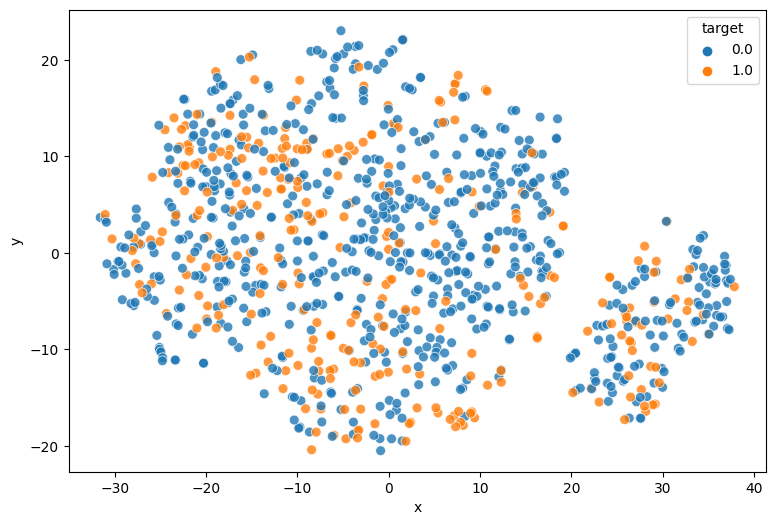

In [23]:


column_trans = make_column_transformer(
    (ohe, categorical),
    (oe, ordinal),
    (StandardScaler(), numerical),
    remainder='passthrough')


X_ = column_trans.fit_transform(X)

from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    n_iter=400,
    n_iter_without_progress=150,
    n_jobs=2,
    random_state=41,
)


tsne_projection = tsne.fit_transform(X_)

tsne_df = pd.DataFrame(
    np.c_[tsne_projection, y], 
    columns=['x', 'y', 'target']
)

plt.figure(figsize=(9, 6))
sns.scatterplot(tsne_df, x="x", y="y", hue="target", s=50, alpha=.8)

T-sne for just numerical features 

<Axes: xlabel='x', ylabel='y'>

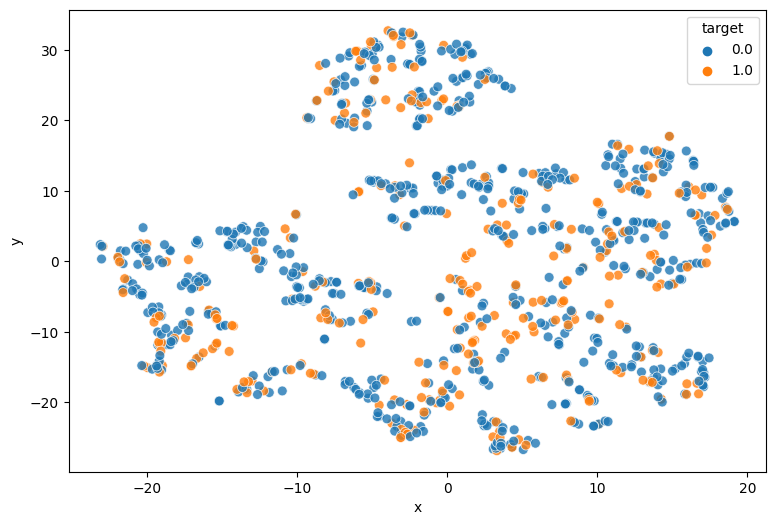

In [12]:
column_trans = make_column_transformer(
    (StandardScaler(), numerical),
    remainder='passthrough')


X_ = column_trans.fit_transform(X[numerical])

tsne = TSNE(
    n_components=2,
    n_iter=400,
    n_iter_without_progress=150,
    n_jobs=2,
    random_state=41,
)


tsne_projection = tsne.fit_transform(X_)

tsne_df = pd.DataFrame(
    np.c_[tsne_projection, y], 
    columns=['x', 'y', 'target']
)

plt.figure(figsize=(9, 6))
sns.scatterplot(tsne_df, x="x", y="y", hue="target", s=50, alpha=.8)

T-sne jus for categoricals features


<Axes: xlabel='x', ylabel='y'>

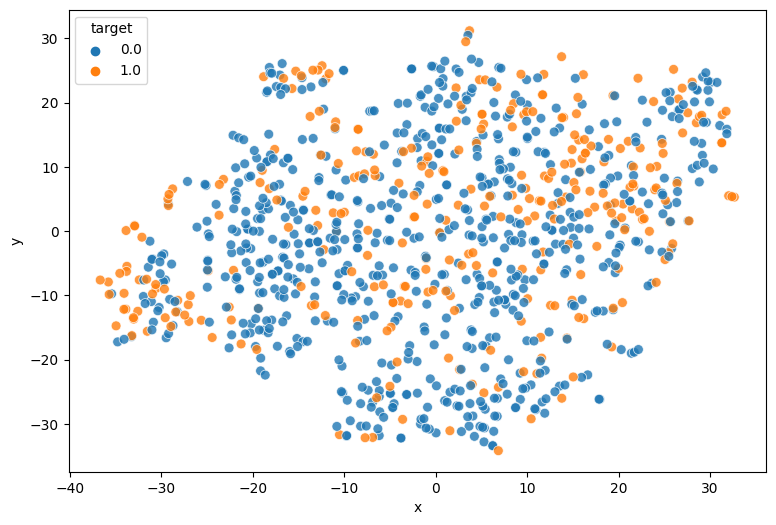

In [13]:
column_trans = make_column_transformer(
    (ohe, categorical),
    (oe, ordinal),
    remainder='passthrough')


all_categoricals = X.drop(numerical, axis=1).columns

X_ = column_trans.fit_transform(X[all_categoricals])

tsne = TSNE(
    n_components=2,
    n_iter=400,
    n_iter_without_progress=150,
    n_jobs=2,
    init='random'
)


tsne_projection = tsne.fit_transform(X_)

tsne_df = pd.DataFrame(
    np.c_[tsne_projection, y], 
    columns=['x', 'y', 'target']
)

plt.figure(figsize=(9, 6))
sns.scatterplot(tsne_df, x="x", y="y", hue="target", s=50, alpha=.8)

In [14]:
# If `scoring` represents multiple scores, one can use:

        # - a list or tuple of unique strings;
        # - a callable returning a dictionary where the keys are the metric
        #   names and the values are the metric scores;
        # - a dictionary with metric names as keys and callables a values.
        
scoring_method = ['accuracy', 'precision', 'recall', 'f1']
results = []

In [15]:
X_train, X_test, y_train, y_test  = split_data(df)

In [16]:
logistic_regression = GridSearchCV(
    # using logistic regression with balanced class weights
    # beacuse the dataset is imbalanced and bad class is the minority
    estimator=LogisticRegression(class_weight='balanced'), 
    param_grid={
        # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
        'penalty': ['l1', 'l2', None],  # l1 and l2 regularization
        'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0], # regularization strength
        'solver': ['liblinear', 'lbfgs','newton-cholesky'] 
    },
    n_jobs=8,
    cv=5,
    

        
    scoring=scoring_method,
    refit=False
)

pipeline = make_pipeline(
    preprocessing_pipeline,
    logistic_regression
)


pipeline.fit(X_train, y_train,)

# Get the cv_results_
cv_results = pipeline[-1].cv_results_

scoring_metrics = scoring_method

estimator_results = {'Classifier': 'logistic_regression'}

for metric in scoring_metrics:
    best_index = cv_results['rank_test_{}'.format(metric)].argmin()
    best_params = cv_results['params'][best_index]
    best_score = cv_results['mean_test_{}'.format(metric)][best_index]

    estimator_results[metric] = best_score
    estimator_results[f'Best Parameters for {metric}'] = best_params
    
    print(f'Best score for {metric}: {best_score}')
    
results.append(estimator_results)

Best score for accuracy: 0.73125
Best score for precision: 0.544606359823751
Best score for recall: 0.7151360544217688
Best score for f1: 0.6164506957369585


C:\Users\parch\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
165 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\parch\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parch\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users

In [17]:
random_forest = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced'),
    param_grid={
        'n_estimators': [50, 100, 150, 200, 250, 300, 400, 500],
        'max_features':["sqrt", "log2", None],
        'max_depth': [None, 5, 10, 15, 20, 25, 30, 35]
    },
    n_jobs=8,
    cv=5,
        
    scoring=scoring_method,
    refit=False
)

pipeline = make_pipeline(
    preprocessing_pipeline,
    random_forest
)

pipeline.fit(X_train, y_train,)

# Get the cv_results_
cv_results = pipeline[-1].cv_results_

scoring_metrics = scoring_method

estimator_results = {'Classifier': 'Random Forest'}

for metric in scoring_metrics:
    best_index = cv_results['rank_test_{}'.format(metric)].argmin()
    best_params = cv_results['params'][best_index]
    best_score = cv_results['mean_test_{}'.format(metric)][best_index]

    estimator_results[metric] = best_score
    estimator_results[f'Best Parameters for {metric}'] = best_params
    
    print(f'Best score for {metric}: {best_score}')
    
results.append(estimator_results)

Best score for accuracy: 0.78875
Best score for precision: 0.7694975514330353
Best score for recall: 0.7066326530612244
Best score for f1: 0.6147121661268785


In [18]:
svc = GridSearchCV(
    estimator=SVC(class_weight='balanced'),
    param_grid={
        'kernel' : ['linear', 'poly', 'rbf'],
        'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0,7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 20.0]
    },
    cv=5,
    n_jobs=8,
    
    scoring=scoring_method,
    refit=False
)

pipeline = make_pipeline(
    preprocessing_pipeline,
    svc
)

pipeline.fit(X_train, y_train,)

# Get the cv_results_
cv_results = pipeline[-1].cv_results_

scoring_metrics = scoring_method

estimator_results = {'Classifier': 'SVM'}

for metric in scoring_metrics:
    best_index = cv_results['rank_test_{}'.format(metric)].argmin()
    best_params = cv_results['params'][best_index]
    best_score = cv_results['mean_test_{}'.format(metric)][best_index]

    estimator_results[metric] = best_score
    estimator_results[f'Best Parameters for {metric}'] = best_params
    
    print(f'Best score for {metric}: {best_score}')
    
results.append(estimator_results)

Best score for accuracy: 0.75625
Best score for precision: 0.6100877036678023
Best score for recall: 0.8513605442176871
Best score for f1: 0.606188331707248


C:\Users\parch\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 255.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\parch\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parch\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\parch\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_pa

***SECTION 3***

In [22]:
results_df = pd.DataFrame(results)
results_df

,Classifier,accuracy,Best Parameters for accuracy,precision,Best Parameters for precision,recall,Best Parameters for recall,f1,Best Parameters for f1
0,logistic_regression,0.73125,"{'C': 0.3, 'penalty': 'l2', 'solver': 'libline...",0.544606,"{'C': 0.3, 'penalty': 'l2', 'solver': 'libline...",0.715136,"{'C': 0.3, 'penalty': 'l2', 'solver': 'libline...",0.616451,"{'C': 0.3, 'penalty': 'l2', 'solver': 'libline..."
1,Random Forest,0.78875,"{'max_depth': 10, 'max_features': 'log2', 'n_e...",0.769498,"{'max_depth': 35, 'max_features': 'sqrt', 'n_e...",0.706633,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.614712,"{'max_depth': 10, 'max_features': None, 'n_est..."
2,SVM,0.75625,"{'C': 20.0, 'kernel': 'rbf'}",0.610088,"{'C': 20.0, 'kernel': 'rbf'}",0.851361,"{'C': 0.1, 'kernel': 'poly'}",0.606188,"{'C': 0.1, 'kernel': 'linear'}"


We are currently endeavoring to identify unfavorable instances,</br>
and as a result, I have selected the support vector machine (SVM) due to its highest F1 score nad accuracy.</br>


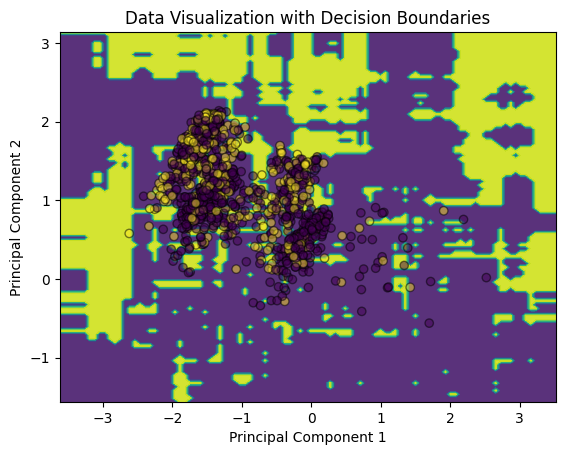

In [20]:
rf = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators= 50)

pca = PCA(n_components=2)

pipeline = make_pipeline(
    preprocessing_pipeline,
    pca,
    rf
)

pipeline.fit(X, y)

column_trans = make_column_transformer(
    (ohe, categorical),
    (oe, ordinal),
    (StandardScaler(), numerical),
    remainder='passthrough')


X_ = column_trans.fit_transform(X)

X_pca = pca.transform(X_)


# Create a DecisionBoundaryDisplay object using the fitted classifier and the reduced data
DecisionBoundaryDisplay.from_estimator(
    rf, X_pca, response_method="predict", alpha=0.9
)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=.5, edgecolor="k")

plt.title('Data Visualization with Decision Boundaries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Train accuracy score: 98.50%
Test accuracy score: 76.00%
Train f1 score: 97.47%
Test f1 score: 52.94%
Train precision score: 99.57%
Test precision score: 61.36%
Train recall score: 95.45%
Test recall score: 46.55%


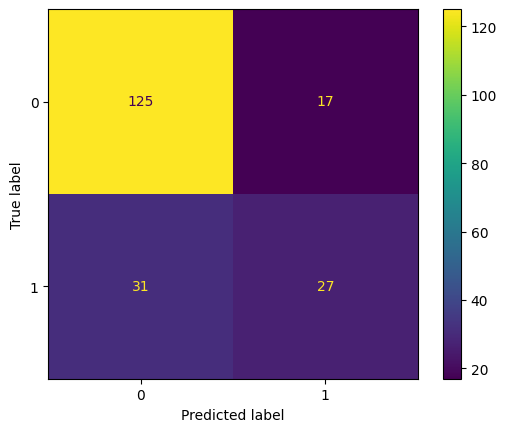

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['duration',
                                                                    'credit_amount',
                                                                    'installment_commitment',
                                                                    'residence_since',
                                                                    'age',
                                                                    'existing_credits',
                                                                    'num_dependents']),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder())]),
                                                                   ['ch...
                                                                    ' '
                                                                    'foreign_worker']),
                                                                  ('pipeline-3',
                                                                   Pipeline(steps=[('ordinalencoder',
                                                                                    OrdinalEncoder(categories=[['unemployed',
                                                                                                                '<1',
                                                                                                                '1<=X<4',
                                                                                                                '4<=X<7',
                                                                                                                '>=7'],
                                                                                                               ['no '
                                                                                                                'known '
                                                                                                                'savings',
                                                                                                                '<100',
                                                                                                                '100<=X<500',
                                                                                                                '500<=X<1000',
                                                                                                                '>=1000']]))]),
                                                                   ['employment',
                                                                    'savings_status'])]))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, max_features=None,
                                        n_estimators=500))])

In [21]:
rf = RandomForestClassifier(max_depth=10, max_features=None , n_estimators= 500)

model = make_pipeline(
    preprocessing_pipeline,
    rf
)
    
model.fit(X_train, y_train,)

fit_and_evaluate(model, X_train, y_train, X_test, y_test)